In [1]:
# This is a sample Python script. here we install all pacakge 

import rebound  # import external modules/libraries to the project.
from matplotlib import pyplot as plt  # 2 ways to import matplotlib pyplot as plt
# also rebound has some functions using matplotlib to draw plots.
import time
#  to record the time function
import numpy as np

import datetime
# re record the day time 

In [19]:


# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
start_time = time.time()
#  to record the starting time
sim = rebound.Simulation()  # This line creates a new simulation object called 'sim'.
sim.add("Sun", hash = 'Sun')  # This line adds the Sun to the simulation.
sim.add("Jupiter")  # Adds the Jupiter
sim.add("Saturn")  # Adds the Saturn

print(sim.particles[0].hash)

mass_Sun=sim.particles[0].m
mass_Jupiter=sim.particles[1].m

for particle in sim.particles:
    index = 
    print("The mass of", particle.hash, particle.m )

#sim.add (BH/ star)
#sim.add("Earth") 
#REBOUND assumes the orbital elements describe the particle's orbit around the centre of mass of all particles added previously\\
# two different way to add particles 
# sim.add(m=1e-3, x=1., vy=1.)  Cartesian coordinates
# sim.add(m=1e-3, a=2., e=0.1) describe the particle's orbit around the centre of mass of all particles added previously

p = rebound.Particle()
p.m = 5.
p.x = 5.
# p.a = 4. primary particle ?
sim.add(p)
#sim.add(m=0.5, x=1, a=4, e= 0.8)  # add a star of mass 1
energy = sim.energy() 

E_initial = sim.energy()  # gives the initial energy
print("The initial energy is ", E_initial)

for orbit in sim.calculate_orbits():
    print(orbit)

sim.add("Churyumov-Gerasimenko", m=5.03e-18) # add comet 

 #REBOUND assumes that G=1, unit of length one astronomical unit, 1AU , Unit of time, Year/2Pi 


fig = rebound.OrbitPlot(sim, unitlabel="[AU]")
plt.show()



SyntaxError: invalid syntax (2567078086.py, line 15)

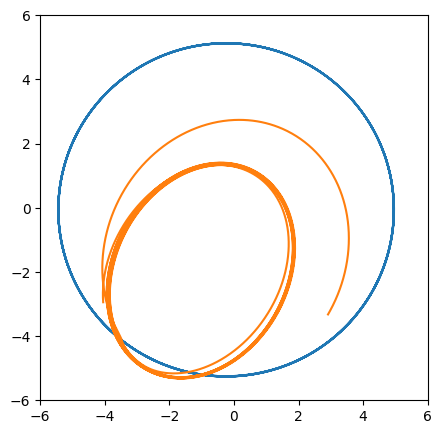

In [ ]:
sim.dt = 0.01 # unit ? inertial timestep old time ? why negative?
#  timestep, the shorter the time step is, the more precise the result will be.
#  However,  shorter timestep requires more computational resources.
Noutputs = 10000 #store the positions of Jupiter and the comet at 10000 times during the interval
year = 2. * np.pi  # One year in units where G=1 , 2pi.
ages = np.linspace(0., -70. * year, Noutputs)  # 70 YEARS is the simulation time 
x = np.zeros((2, Noutputs)) #np.zeros creates an array filled with zeros, it will have 2 rows and Noutputs columns, and all elements will be zeros. 
y = np.zeros((2, Noutputs)) 
z = np.zeros((2, Noutputs))

sim.integrator = "ias15"  # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()  # We always move to the center of momentum frame before an integration
ps = sim.particles  # ps is now an array of pointers and will change as the simulation runs

for i, age in enumerate(ages):
    sim.integrate(age)
    x[0][i] = ps[1].x  # This stores the data which allows us to plot it later, we store dates in  the first row 
    y[0][i] = ps[1].y  #[1] is the index for Jupiter
    z[0][i] = ps[1].z
    x[1][i] = ps[3].x # we store the  2nd row. 
    y[1][i] = ps[3].y  # 3 is the index for the comet
    z[1][i] = ps[3].z

fig = plt.figure(figsize=(5, 5)) 
ax = plt.subplot(111)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);
plt.show()




Minimum distance (0.046905 AU) occurred at time: -64.644464 years.


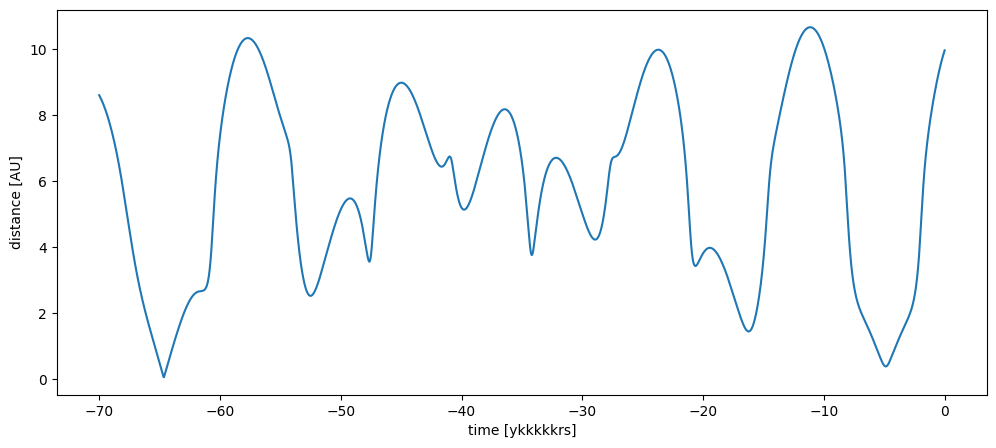

In [ ]:
# now we want to see when the two bodies (comet 67P and Jupiter) had a close encounter. we plot their distance as a function of time.



fig = plt.figure(figsize=(12, 5))  # it givess the size and used the matplotlib package 
ax = plt.subplot(111)
ax.set_xlabel("time [ykkkkkrs]") 
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0] - x[1]) + np.square(y[0] - y[1]) + np.square(z[0] - z[1])) 
plt.plot(ages / year, distance);
closeencountertime = ages[np.argmin(distance)] / year

print("Minimum distance (%f AU) occurred at time: %f years." % (np.min(distance), closeencountertime))


In [ ]:
E_end = sim.energy()
\
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25 * closeencountertime)
encounterdate.strftime("%Y-%m-%d %H:%M")

Delta_E = E_end - E_initial
E_ratio = Delta_E/E_initial *100  # function to calculate 

end_time = time.time()
#  to record the end time
total_time = end_time - start_time
#  Kindergarten math to calculate the time

print(f"the running costs: {total_time:.2f} second")
#  output the result

print("The initial energy is ", E_initial)
print("The end energy is ", E_end)  #gives the end energy
print(f"the energy error ratio is:{E_ratio:.10f}%" )

the running costs: 9.09 second
The initial energy is  -0.00010674924437708613
The end energy is  -0.00010674949732947383
the energy error ratio is:0.0002369594%


In [ ]:
# here is a cell about using the orbital elements  to plot diagrams. 
for orbit in sim.calculate_orbits():
    print(orbit)


#All simulations are performed in Cartesian elements, so to avoid the overhead, REBOUND does not update particles' orbital elements as the simulation progresses

print(orbit.a)


# To store the semi_major axis, and the eccentricity, we need a zero array for it.  
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
for i,age in enumerate(ages):
  sim.integrate(age,exact_finish_time=0)   #If primary is not given, Jacobi coordinates are used.

a[i] = sim.particles[1].a
e[i] = sim.particles[1].e


<rebound.Orbit instance, a=5.202787652991077 e=0.048918687328455765 inc=0.022778718472147647 Omega=1.7521506993760603 omega=4.7795731847842715 f=1.1251390346998216>
<rebound.Orbit instance, a=9.544978078603586 e=0.05404113699875132 inc=0.04337888019706905 Omega=1.985781545163434 omega=5.917165404886053 f=2.0661914050697536>
<rebound.Orbit instance, a=4.302217057116473 e=0.34081304640885707 inc=0.4326277538536468 Omega=0.9154866863383184 omega=0.5091394293837981 f=4.081903017266637>
4.302217057116473


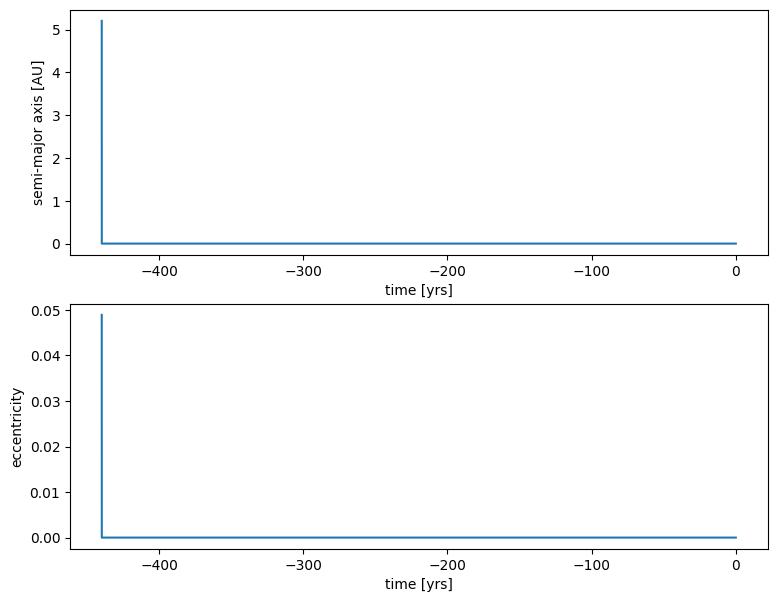

In [ ]:
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(211) 
ax.set_xlabel("time [yrs]")
ax.set_ylabel("semi-major axis [AU]")
plt.plot(ages,a) # plot the semi_major axis.
ax = plt.subplot(212)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("eccentricity")
plt.plot(ages,e); #


